# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name:
* Student Net ID:
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [ ]:
# A code block with your classes.
import numpy as np
import pandas as pd
import random
from itertools import combinations

class Die():
    """
    A class to represent a die.
    
    ...
    Attributes
    ----------
    faces : list
        a series of die faces
        
    weights : list
        a series of weights for each die face, defaults to 1
        
    Methods
    -------
    change_weight(face_changed, new_weight):
        Changes the weight of the face corresponding to the user input

    roll(times_to_roll=1):
        The amount of times the user would like to roll an individual die, defaults to 1

    reveal():
        Returns the dataframe for the dice object 
    """
    def __init__(self, faces, weights = 1):
        """
        Constructs all the necessary attributes for the die object
        
        Parameters
        ----------
            faces : list
                a series of die faces
            weights: list
                a series of weights for each die face, default to 1
        """
        self.faces = pd.Series(faces)
        self.weights = weights
        self._df = pd.DataFrame({'faces' : self.faces,
                                  'weights' : self.weights})

    def change_weight(self, face_changed, new_weight):
        """
        Changes the weight of the face corresponding to the user input
        
        Parameters
        ----------
            face_changed : number or string
                the face that the user wants changed
            new_weight : float
                the number that the user wants the weight of the die face changed to
                
        Returns
        -------
        None
        """
        new_weight = float(new_weight)
        if face_changed in self._df['faces'].values:
            for i in range(0, len(self._df.faces)):
                if self._df['faces'][i] == face_changed:
                    self._df['weights'][i] = new_weight
                else:
                    pass
        else:
            print("The face_changed is not in the list of faces")
           
    def roll(self, times_to_roll=1):
        """
        The amount of times the user would like to roll an individual die, defaults to 1
        
        Parameters
        ----------
        times_to_roll : int
            the amount of times the user wants their die to roll
        
        Returns
        -------
        list_of_outcomes : list
            a list of outcomes for the number of rolls
        """
        list_of_outcomes = random.choices(self._df.faces, weights = self._df.weights, cum_weights = None, k = times_to_roll)
        return list_of_outcomes
    
    def reveal(self):
        """
        Reveals the die dataframe containing the faces and weights of each die
        
        Parameters
        ----------
        None
        
        Returns
        -------
        self._df : pandas dataframe
            the die dataframe containing the faces and weights of each die"""
        return self._df
    
class Game():
    """
    A class to represent a game which consists of rolling one or more dice of the same kind one or more times
    
    ...
    Attributes
    ----------
    list_of_dice : list
        a list of die that were instantiated using the Die class
        
    Methods
    -------
    play(roll_times):
        Rolls each die in the dice list the amount of times specified by the user

    show(choice='wide'):
        Shows the user the results of the rolls.
    """
    
    def __init__(self, list_of_dice):
        """
        Constructs all the necessary attributes for the game object
        
        Parameters
        ----------
        list_of_dice : list
            a list of die that were instantiated using the Die class
        """
        self.list_of_dice = list_of_dice
        
    def play(self, roll_times):
        """
        Rolls each die in the dice list the amount of times specified by the user
        
        Parameters
        ----------
        roll_times : int
            the amount of times the user wants their list of die to roll for the game
        """
        roll_outcome = []
        header = []
        for x in range(0,len(self.list_of_dice)):
            roll_outcome.append(self.list_of_dice[x].roll(roll_times))
        for x in range(0,len(self.list_of_dice)):
            header.append("Die " + str(x+1))
        _faces_df = pd.DataFrame(roll_outcome)
        self._faces_df = _faces_df.T
        self._faces_df = self._faces_df.set_axis(header, axis=1)
        self._faces_df.index.name = 'Roll Number'
              
    def show(self, choice='wide'):
        """
        Shows the user the results of the rolls.
        
        Parameters
        ----------
        choice : string
            the user specifies if they would like the dataframe returned to be 'wide' or 'narrow'
            
        Returns
        -------
        self.faces_df : pandas dataframe
            a dataframe with the roll number as the index, each die from the list_of_dice list as a column, and the results of each roll as a value
            
        self.narrow_df : pandas dataframe
            a dataframe with a two column index consisting of the roll number and the die number and a single column showing the faces rolled"""
        if choice == 'wide':
            return self._faces_df
        elif choice == 'narrow':
            self._narrow_df = pd.DataFrame(self._faces_df.stack())
            return self._narrow_df
        if choice != 'wide' or choice != 'narrow':
            raise Exception("You must either input 'wide' or 'narrow'")
    
class Analyzer():
    """
    A class to represent an analyzer which analyzes a game played of dice played
    
    ...
    Attributes
    ----------
    game : object
        an object instantiated from the game class
    self.access : pandas dataframe
        a dataframe showing the results from the game object
        
    Methods
    -------
    jackpot():
        Shows the user how many times a roll resulted in all faces being the same.

    combo():
        Shows the suer how many combination types of faces were rolled and their counts.

    face_counts_per_roll():
        Computes how many times a given face is rolled for each roll of a game.
    """
    
    def __init__(self, game):
        """
        Constructs all the necessary attributes for the analyzer object
        
        Parameters
        ----------
        game : object
            an object instantiated from the game class
        """
        self.game = game
        self.access = self.game.show()
        
    def jackpot(self):
        """
        Shows the user how many times a roll resulted in all faces being the same.
        
        Parameters
        ----------
        None
        
        Returns
        -------
        jackpot print statement : string
            A string telling the user the number of jackpots in their game"""
        self.jackpot = 0
        results = self.access.nunique(axis = 1).eq(1)
        self.jackpot_df = self.access[self.access.nunique(axis = 1).eq(1)]
        for i in range(0, len(results)):
            if results[i] == True:
                self.jackpot += 1
        return print("Here are your number of jackpots: " + str(self.jackpot))

    def combo(self):
        """
        Shows the suer how many combination types of faces were rolled and their counts.
        """
        self.combo_df = self.access.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n')
    
    def face_counts_per_roll(self):
        """
        Computes how many times a given face is rolled for each roll of a game.
        """
        self.face_count_df = self.access.apply(pd.Series.value_counts, axis=1).fillna(0)

# Test Module

In [ ]:
# A code block with your test code.
import unittest
from ClassesFinalProject import *
import pandas as pd

class ClassesFinalProjectSuite(unittest.TestCase):
    
    def test_01_change_weight(self):
        """
        Tests the change_weight method by making sure the value from the weight database column is the same as the user input
        """
        test1 = Die([1,2,3])
        test1.change_weight(1,2)
        self.assertEqual(test1._df.faces[1],2)

    def test_02_change_weight(self):
        """
        Tests the change_weight method by returning false saying the weight database column is not equal to the incorrect number
        """
        test2 = Die([1,2,3])
        test2.change_weight(1,2)
        self.assertFalse(test2._df.faces[1] == 3)
        
    def test_03_roll(self):
        """
        Tests the roll method by making sure that it rolls the amount of time the user specifies
        """
        test3 = Die([1,2,3])
        self.assertEqual(len(test3.roll(10)),10)
    
    def test_04_reveal(self):
        """
        Tests the reveal method by making sure the dataframe created equals the number of faces input by the user
        """
        test4 = Die([1,2,3])
        self.assertEqual(len(test4._df), 3)
        
    def test_05_play(self):
        """
        Tests the play method by making sure the length of the resulting play data fram equals the number of plays input by the user
        """
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        game_dice = [die1, die2, die3]
        test5_game = Game(game_dice)
        test5_game.play(10)
        self.assertEqual(len(test5_game._faces_df),10)

    def test_06_show_wide(self):
        """
        Tests the show method to make sure the outputting dataframe is wide by measing the length of columns in the dataframe
        """
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        game_dice = [die1, die2, die3]
        test6_game = Game(game_dice)
        test6_game.play(10)
        test6_game.show('wide')
        self.assertEqual(len(test6_game._faces_df.columns), 3)

    def test_07_show_narrow(self):
        """
        Tests the show method to make sure the outputting dataframe is narrow by measuring the length of the columns in the dataframe
        """
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        game_dice = [die1, die2, die3]
        test7_game = Game(game_dice)
        test7_game.play(10)
        test7_game.show('narrow')
        self.assertEqual(len(test7_game._narrow_df.columns), 1)

    def test_08_jackpot(self):
        """
        Tests the jackpot method by making sure the number of jackpots returned for a very unfair couple of dice is at least 1
        """
        die1 = Die([1,2], [100, 1])
        die2 = Die([1,2], [100, 1])
        game_dice = [die1, die2]
        test8_game = Game(game_dice)
        test8_game.play(10)
        test8_analysis = Analyzer(test8_game)
        test8_analysis.jackpot()
        self.assertTrue(test8_analysis.jackpot > 1)

    def test_09_combos(self):
        """
        Tests the combo method by making sure the dataframe outputs an entry
        """
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        game_dice = [die1, die2, die3]
        test9_game = Game(game_dice)
        test9_game.play(1)
        test9_analysis = Analyzer(test9_game)
        test9_analysis.combo()
        self.assertEqual(len(test9_analysis.combo_df), 1)

    def test_10_face_counts_per_roll(self):
        """
        Tests the face_counts_per_roll method by rolling a dice only one time and making sure the result sums to 1
        """
        die1 = Die([1,2,3,4,5,6])
        game_dice = [die1]
        test10_game = Game(game_dice)
        test10_game.play(1)
        test10_analysis = Analyzer(test10_game)
        test10_analysis.face_counts_per_roll()
        self.assertEqual(test10_analysis.face_count_df.sum(axis=1).values, 1)


        
        
if __name__ == '__main__':

    unittest.main(verbosity=3)

# Test Results

In [ ]:
# A text block with the output of a successful test.
test_01_change_weight (__main__.ClassesFinalProjectSuite)
Tests the change_weight method by making sure the value from the weight database column is the same as the user input ... ok
test_02_change_weight (__main__.ClassesFinalProjectSuite)
Tests the change_weight method by returning false saying the weight database column is not equal to the incorrect number ... ok
test_03_roll (__main__.ClassesFinalProjectSuite)
Tests the roll method by making sure that it rolls the amount of time the user specifies ... ok
test_04_reveal (__main__.ClassesFinalProjectSuite)
Tests the reveal method by making sure the dataframe created equals the number of faces input by the user ... ok
test_05_play (__main__.ClassesFinalProjectSuite)
Tests the play method by making sure the length of the resulting play data fram equals the number of plays input by the user ... ok
test_06_show_wide (__main__.ClassesFinalProjectSuite)
Tests the show method to make sure the outputting dataframe is wide by measing the length of columns in the dataframe ... ok
test_07_show_narrow (__main__.ClassesFinalProjectSuite)
Tests the show method to make sure the outputting dataframe is narrow by measuring the length of the columns in the dataframe ... ok
test_08_jackpot (__main__.ClassesFinalProjectSuite)
Tests the jackpot method by making sure the number of jackpots returned for a very unfair couple of dice is at least 1 ... ok
test_09_combos (__main__.ClassesFinalProjectSuite)
Tests the combo method by making sure the dataframe outputs an entry ... ok
test_10_face_counts_per_roll (__main__.ClassesFinalProjectSuite)
Tests the face_counts_per_roll method by rolling a dice only one time and making sure the result sums to 1 ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.022s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1- Coin Flip

In [1]:
from ClassesFinalProject import *
import matplotlib.pyplot as plt

__Create 3 fair coins:__

In [2]:
fair_coin1 = Die(['H','T'])
fair_coin2 = Die(['H','T'])
fair_coin3 = Die(['H','T'])

fair_coins = [fair_coin1, fair_coin2, fair_coin3]

__Play 1000 games with a fair coin:__

In [3]:
fair_game = Game(fair_coins)

fair_game.play(1000)

__Analyze the fair flip game:__

In [4]:
fair_coin_analyzer = Analyzer(fair_game)

__Jackpot frequency:__

In [5]:
fair_coin_analyzer.jackpot()

Here are your number of jackpots: 249


__Here is the relative frequency of jackpots:__

In [6]:
fair_coin_jackpot = (fair_coin_analyzer.jackpot / 1000)
print(fair_coin_jackpot)

0.249


__Create 2 unfair coins and a fair coin:__

In [7]:
unfair_game_coin1 = Die(['H','T'])
unfair_game_coin2 = Die(['H','T'])
unfair_game_coin3 = Die(['H','T'])

__Change the coin's weight__

In [8]:
unfair_game_coin1.change_weight('H', 5)
unfair_game_coin2.change_weight('H', 5)

/Users/theothormann/Desktop/Data Science/DS5001/MonteCarlo/ClassesFinalProject.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df['weights'][i] = new_weight


In [9]:
unfair_game_coins = [unfair_game_coin1, unfair_game_coin2, unfair_game_coin3]

__Play 1000 weighted games__

In [10]:
unfair_game = Game(unfair_game_coins)

unfair_game.play(1000)

__Analyze the unfair game:__

In [11]:
unfair_coin_analyzer = Analyzer(unfair_game)

__Jackpot frequency:__

In [12]:
unfair_coin_analyzer.jackpot()

Here are your number of jackpots: 373


__Relative jackpot frequency:__

In [13]:
unfair_coin_jackpot = (unfair_coin_analyzer.jackpot / 1000)
print(unfair_coin_jackpot)

0.373


__Bar graph showing the difference between the results:__

<BarContainer object of 2 artists>

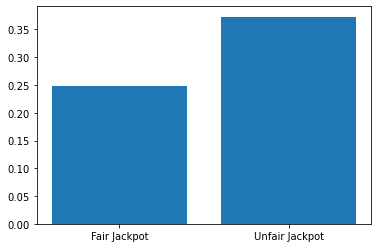

In [14]:
names = ['Fair Jackpot', 'Unfair Jackpot']
results = [fair_coin_jackpot, unfair_coin_jackpot]

plt.bar(names, results)

## Scenario 2 - Dice Roll

__Create five fair dice with 6 sides__

In [15]:
die1 = Die([1,2,3,4,5,6])
die2 = Die([1,2,3,4,5,6])
die3 = Die([1,2,3,4,5,6])
die4 = Die([1,2,3,4,5,6])
die5 = Die([1,2,3,4,5,6])

__Create two unfair dice where 6 is weighted heavier__

In [16]:
die1_weighted6 = Die([1,2,3,4,5,6])
die2_weighted6 = Die([1,2,3,4,5,6])

die1_weighted6.change_weight(6, 5)
die2_weighted6.change_weight(6, 5)

__Create one unfair dice where 1 is weighted heavier__

In [17]:
die1_weighted1 = Die([1,2,3,4,5,6])

die1_weighted1.change_weight(1, 5)

__Create a list of the fair dice__

In [18]:
fair_dice = [die1, die2, die3, die4, die5]

__Create and play a game using five fair dice__

In [19]:
fair_dice_game = Game(fair_dice)
fair_dice_game.play(10000)

__Create a list of dice for the unfair game__

In [20]:
unfair_game_dice = [die1, die2, die1_weighted6, die2_weighted6, die1_weighted1]

__Create and play an unfair game__

In [21]:
unfair_dice_game = Game(unfair_game_dice)
unfair_dice_game.play(10000)

__Create an analyzer for the fair and unfair dice games__

In [22]:
fair_dice_analyzer = Analyzer(fair_dice_game)
unfair_dice_analyzer = Analyzer(unfair_dice_game)

__Analyze the jackpot for the fair dice game__

In [23]:
fair_dice_analyzer.jackpot()

Here are your number of jackpots: 7


In [24]:
fair_dice_jackpot = (fair_dice_analyzer.jackpot / 10000)
print(fair_dice_jackpot)

0.0007


__Analyze the jackpot for the unfair dice game__

In [25]:
unfair_dice_analyzer.jackpot()

Here are your number of jackpots: 8


In [26]:
unfair_dice_jackpot = (unfair_dice_analyzer.jackpot / 10000)
print(unfair_dice_jackpot)

0.0008


__Bar graph showing the difference between the results:__

<BarContainer object of 2 artists>

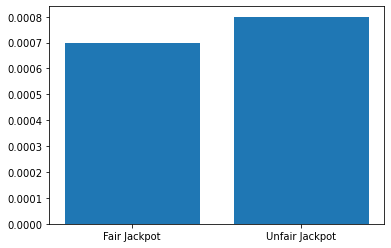

In [27]:
names = ['Fair Jackpot', 'Unfair Jackpot']
results = [fair_dice_jackpot, unfair_dice_jackpot]

plt.bar(names, results)

__Run the combo analyzer on the fair and unfair dice games__

In [28]:
fair_dice_analyzer.combo()
unfair_dice_analyzer.combo()

__Create a bar graph for the Fair Dice Game__

<AxesSubplot:xlabel='0,1,2,3,4'>

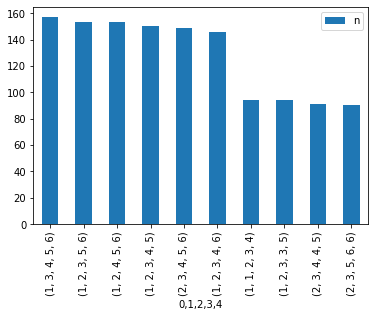

In [29]:
fair_dice_analyzer.combo_df.head(10).plot.bar()

__Create a bar graph for the Fair Dice Game__

<AxesSubplot:xlabel='0,1,2,3,4'>

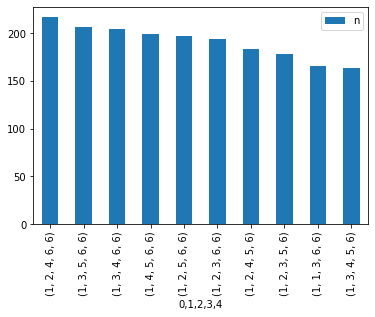

In [30]:
unfair_dice_analyzer.combo_df.head(10).plot.bar()

## Scenario 3 - Alphabet

__Create five dice with the alphabet as faces on each die__

In [32]:
alpha1 = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4839, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722])
alpha2 = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4839, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722])
alpha3 = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4839, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722])
alpha4 = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4839, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722])
alpha5 = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
            [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4839, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722])

alpha_list = [alpha1, alpha2, alpha3, alpha4, alpha5]

__Create and play a game using the five alphabet dice__

In [33]:
alpha_game = Game(alpha_list)
alpha_game.play(1000)

__Create an analyzer for the alphabet game__

In [34]:
alpha_game_analyzer = Analyzer(alpha_game)

__Display the results of the alphabet game__

In [35]:
alpha_game.show().head(10)

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
0,r,e,e,s,e
1,a,n,b,a,n
2,o,t,h,p,l
3,d,f,s,d,r
4,y,l,g,w,a
5,i,i,t,l,h
6,r,t,f,a,t
7,a,e,l,f,e
8,c,n,r,e,n


After looking through the alphabet game display, it seems like there were no actual words that were created.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [36]:
!ls -lRF -o

total 288
-rw-r--r--@ 1 theothormann   7750 Jul 15 10:52 ClassesFinalProject.py
-rw-r--r--@ 1 theothormann   4092 Jul 14 11:16 ClassesFinalProject_test.py
-rw-r--r--@ 1 theothormann   1810 Jul 15 10:33 ClassesFinalProject_test.txt
-rw-rw-r--@ 1 theothormann  72956 Jul 15 11:03 FinalProjectSubmissionTemplate.ipynb
-rw-r--r--@ 1 theothormann  55509 Jul 15 11:02 Scenarios.ipynb
drwxr-xr-x  4 theothormann    128 Jul 15 10:53 __pycache__/

./__pycache__:
total 48
-rw-r--r--  1 theothormann  8453 Jul 15 10:53 ClassesFinalProject.cpython-39.pyc
-rw-r--r--  1 theothormann  8443 Jul 14 10:34 SecretDB.cpython-39.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [3]:
# Installation commands
!pip install -e .

Obtaining file:///Users/theothormann/Desktop/Data%20Science/DS5001/MonteCarlo-main
  Running setup.py develop for MonteCarlo
